# Phase 1 Project: 

* Student name: Caroline Surratt
* Student pace: Self-Paced
* Scheduled project review date/time: **_TBD_**
* Instructor name: Morgan Jones
* Blog post URL: **_TBD_**


# Overview

This project analyzes which airplanes are the lowest risk for a company seeking to use airplanes for commercial and private enterprises. Airplane safety will be determined using percentages of passengers injured and uninjured, evaluated by airplane make and model. Additional factors (for example, time of day and weather) and their impact on safety will also be considered.

# Data Understanding

The dataset utilized for this analysis contains information about civil aviation accidents in the United States from 1962-2023. It was obtained from the National Transportation Safety Board.

# Importing Data and Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#turned off chained assignment warning, as I was receiving false positive warnings
pd.options.mode.chained_assignment = None

In [2]:
#imported the data from the .csv file and specified dtype for columns with mixed dtypes
df = pd.read_csv("data/Aviation_Data.csv", \
                 dtype={'Latitude': object, 'Longitude': object, 'Broad.phase.of.flight': object})
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Preliminary Data Cleaning

## Removing Incomplete and/or Irrelevant Data

In [3]:
#checked for the number of missing values per column
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

Some of the columns in this dataset are missing a significant proportion of their entries. Not only is some of the data incomplete, some of this information is  outside the scope of my business recommendation. Therefore, several columns will be dropped from the dataset. A further explanation for each of the columns is included below.

* In this dataset, the **FAR Description** provides information about whether certain regulations are applied to the flight (for example, agricultural regulations or regulations for foreign flights). The regulations that the business is subject to will not be determined by the business and therefore analysis of this feature is unneccesary.


* Because the **Schedule** column contains information for less than 14% of the entries in this dataset, it does not make sense to include this feature. Additionally, I would have to make an assumption about the abbreviations used in this column (although it would be reasonable to assume that "SCHD" stands for "scheduled", "NSCH" stands for "unscheduled", and "UNK" stands for unknown). These three abbreviations do occur at roughly the same frequency in the entries, but the sample size is far too small for us to extrapolate this finding.


* The **Air Carrier** column also contains information for less than 20% of the entries in this dataset, and even the entries that do exist do not appear to be standardized: this information was entered as the name of the airline, the name of an individual, and even a generic title, such as "Pilot", "Private", or "Private Individual". I am not able to gain meaningful insight through the entries in this column.


* In addition to there not being location information (**Location, Latitude, Longitude, Airport Code, and Airport Name**) for many of the entries in this dataset, these features will be dependent on where the business conducts their commercial and private enterprises. Location is outside the scope of this recommendation.


* Finally **Publication Date** will not be a factor to consider, as it is not a factor that contributes to risk. 

In [4]:
#dropped each column listed above
df.drop(['FAR.Description', 'Schedule', 'Air.carrier', 'Location', \
         'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Publication.Date'], \
        axis=1, inplace=True)

The same number of entries are missing the Event Id, Accident Number, and Event ID, so I decided to explore this further.

In [5]:
#found the subset of the dataframe for which the Event ID is missing and inspected whether other 
#values were missing from these entries
print(df[df['Event.Id'].isna()].isna().sum())
df[df['Event.Id'].isna()].head(20)

Event.Id                  1459
Investigation.Type           0
Accident.Number           1459
Event.Date                1459
Country                   1459
Injury.Severity           1459
Aircraft.damage           1459
Aircraft.Category         1459
Registration.Number       1459
Make                      1459
Model                     1459
Amateur.Built             1459
Number.of.Engines         1459
Engine.Type               1459
Purpose.of.flight         1459
Total.Fatal.Injuries      1459
Total.Serious.Injuries    1459
Total.Minor.Injuries      1459
Total.Uninjured           1459
Weather.Condition         1459
Broad.phase.of.flight     1459
Report.Status             1459
dtype: int64


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64552,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64570,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64591,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64593,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64725,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Because these entries only tell us that there was an accident (but not the number of fatalities, the type of aircraft (including make/model), the weather, etc.), it does not make sense to include them in the analysis.

In [6]:
#dropped all entries for which the Event ID was missing and reinspected the number of missing values for
#each column
df.dropna(subset=['Event.Id'], inplace=True)
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
dtype: int64

In [7]:
#inspected the values in the "Aircraft.Category" column
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

Because the business is specifically interested in planes, I will also drop all of the entries that indicate they are other forms of aircraft. For now, I will leave in null values, but label these as "Unknown". Because "Airplane" is the clear mode, it would be expected that most of the entries that have missing values would also be classified as "Airplane". We may be able to infer whether they are airplanes later in the exploratory analysis using the "Make" and/or "Model" columns.

In [8]:
#filled missing values with "Unknown"
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')

In [9]:
#included only entries for airplanes and unknown aircrafts (likely airplanes) in the dataframe
df = df[df['Aircraft.Category'].isin(['Airplane', 'Unknown'])]
df['Aircraft.Category'].value_counts()

Unknown     56616
Airplane    27617
Name: Aircraft.Category, dtype: int64

## Converting Remaining Data to Usable Data Types

In [10]:
#converted the dates to datetimes instead of objects
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [11]:
#converted all strings to uppercase in order to get accurate data using the .value_counts() method
columns_of_strings = [column for column in df.columns if df[column].dtype == object]
df[columns_of_strings] = df[columns_of_strings].fillna('Unknown')
for column in columns_of_strings:
    df[column] = df[column].apply(str.upper)
    
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,ACCIDENT,SEA87LA080,1948-10-24,UNITED STATES,FATAL(2),DESTROYED,UNKNOWN,NC6404,STINSON,...,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,UNK,CRUISE,PROBABLE CAUSE
1,20001218X45447,ACCIDENT,LAX94LA336,1962-07-19,UNITED STATES,FATAL(4),DESTROYED,UNKNOWN,N5069P,PIPER,...,1.0,RECIPROCATING,PERSONAL,4.0,0.0,0.0,0.0,UNK,UNKNOWN,PROBABLE CAUSE
2,20061025X01555,ACCIDENT,NYC07LA005,1974-08-30,UNITED STATES,FATAL(3),DESTROYED,UNKNOWN,N5142R,CESSNA,...,1.0,RECIPROCATING,PERSONAL,3.0,NaN,NaN,NaN,IMC,CRUISE,PROBABLE CAUSE
3,20001218X45448,ACCIDENT,LAX96LA321,1977-06-19,UNITED STATES,FATAL(2),DESTROYED,UNKNOWN,N1168J,ROCKWELL,...,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE,PROBABLE CAUSE
4,20041105X01764,ACCIDENT,CHI79FA064,1979-08-02,UNITED STATES,FATAL(1),DESTROYED,UNKNOWN,N15NY,CESSNA,...,NaN,UNKNOWN,PERSONAL,1.0,2.0,NaN,0.0,VMC,APPROACH,PROBABLE CAUSE


In [12]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5391
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries      10855
Total.Serious.Injuries    12014
Total.Minor.Injuries      11479
Total.Uninjured            5732
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

Although there is still some missing information in our dataset (number of engines and number of injuries), I will proceed with exploratory data analysis, as I have eliminated the columns that are not of importance to this analysis and the rows that do not contain enough information to be of value. The columns related to number of injuries will be further examined and cleaned below.

# Exploratory Data Analysis

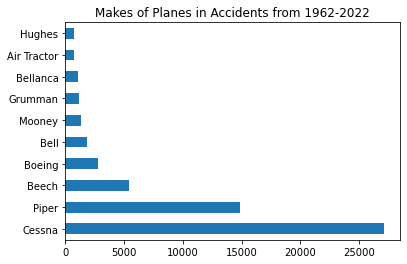

In [13]:
#found the ten most common makes and plotted as a horizontal bar chart
most_common_makes = df['Make'].str.title().value_counts()[:10]
most_common_makes.plot(kind='barh', \
                       title= "Makes of Planes in Accidents from 1962-2022");

In [14]:
#created a new column called "Make and Model" since model names could be repeated for different makes
df['Make and Model'] = (df['Make'].str.title() + " " + df['Model'].str.title())


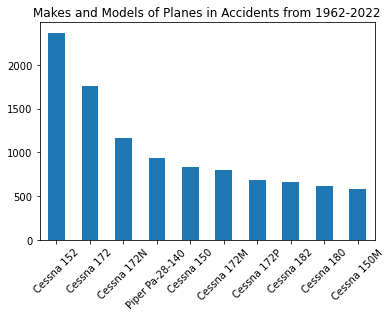

In [15]:
most_common_make_and_model = df['Make and Model'].value_counts()[:10]
most_common_make_and_model.plot(kind='bar', \
                               title= "Makes and Models of Planes in Accidents from 1962-2022", \
                               rot = 45);

# Comparing Injury Percentages by Plane Type

Breaking down the number of accidents by make and model is insufficient for analyzing the safety of these airplanes by make and model because this dataset _only includes information about flights that resulted in accidents/incidents._ If Cessna 152 airplanes are by far the most common type of airplane flown, then it would make sense that these airplanes also account for the highest number of civil aviation accidents.

Although we do not have data to compare which planes are most likely and least likely to be in accidents, we do have data about whether or not these accidents were fatal. Examining this feature will help to illuminate which airplanes are the safest for passengers even when an accident occurs.

### Data Cleaning

Before analyzing which planes are most likely and least likely to be in accidents, entries with missing, incomplete, or nonsensical entries must be adjusted.

In [16]:
#found the subset of the dataframe for which all values about fatalities and injuries were missing
subset = df[df['Total.Fatal.Injuries'].isna() & df['Total.Serious.Injuries'].isna() & \
   df['Total.Minor.Injuries'].isna() & df['Total.Uninjured'].isna()]
subset.index

Int64Index([15579, 18430, 19110, 19342, 20067, 20142, 20344, 20567, 21818,
            22177,
            ...
            62529, 62530, 62583, 62585, 63009, 63178, 63398, 63504, 63646,
            63761],
           dtype='int64', length=219)

There are 219 entries for which we have no information about the number of people killed, injured, or uninjured. Because we cannot gain any information about safety from these entries, they will be dropped from the dataset.

In [17]:
#dropped the subset from the dataframe
df.drop(subset.index, inplace=True)

Next, I took a look at the entries where at least one (but not all) of the information was missing.

In [18]:
#found the entries for which at/least one of the columns about injuries was missing
incomplete_entries = df[df['Total.Fatal.Injuries'].isna() | df['Total.Serious.Injuries'].isna() | \
                       df['Total.Minor.Injuries'].isna() | df['Total.Uninjured'].isna()] 
incomplete_entries.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Make and Model
2,20061025X01555,ACCIDENT,NYC07LA005,1974-08-30,UNITED STATES,FATAL(3),DESTROYED,UNKNOWN,N5142R,CESSNA,...,RECIPROCATING,PERSONAL,3.0,NaN,NaN,NaN,IMC,CRUISE,PROBABLE CAUSE,Cessna 172M
4,20041105X01764,ACCIDENT,CHI79FA064,1979-08-02,UNITED STATES,FATAL(1),DESTROYED,UNKNOWN,N15NY,CESSNA,...,UNKNOWN,PERSONAL,1.0,2.0,NaN,0.0,VMC,APPROACH,PROBABLE CAUSE,Cessna 501
5,20170710X52551,ACCIDENT,NYC79AA106,1979-09-17,UNITED STATES,NON-FATAL,SUBSTANTIAL,AIRPLANE,CF-TLU,MCDONNELL DOUGLAS,...,TURBO FAN,UNKNOWN,NaN,NaN,1.0,44.0,VMC,CLIMB,PROBABLE CAUSE,Mcdonnell Douglas Dc9
89,20020917X02486,ACCIDENT,NYC82DA022,1982-01-15,UNITED STATES,NON-FATAL,SUBSTANTIAL,UNKNOWN,N4875B,CESSNA,...,RECIPROCATING,PERSONAL,NaN,NaN,NaN,2.0,VMC,APPROACH,PROBABLE CAUSE,Cessna 310
260,20020917X02495,ACCIDENT,NYC82DA033,1982-02-07,UNITED STATES,NON-FATAL,SUBSTANTIAL,AIRPLANE,N41694,BELLANCA,...,RECIPROCATING,PERSONAL,NaN,NaN,NaN,2.0,VMC,LANDING,PROBABLE CAUSE,Bellanca 7Kcab


In [19]:
#found the most common values for these columns
print(df['Total.Fatal.Injuries'].value_counts().head(3))
print(df['Total.Serious.Injuries'].value_counts().head(3))
print(df['Total.Minor.Injuries'].value_counts().head(3))
print(df['Total.Uninjured'].value_counts().head(3))

0.0    56576
1.0     8349
2.0     4933
Name: Total.Fatal.Injuries, dtype: int64
0.0    60104
1.0     8478
2.0     2592
Name: Total.Serious.Injuries, dtype: int64
0.0    58228
1.0     9602
2.0     3397
Name: Total.Minor.Injuries, dtype: int64
0.0    27871
1.0    23945
2.0    15177
Name: Total.Uninjured, dtype: int64


It appears that for most entries, missing data indicates a value of 0. For example, look at the entries with index 5, 89, and 280: the injury severity indicates that these accidents were non-fatal, but the number of total fatal entries was not recorded. Additionally, 0 is the most common value for each of these four categories (fatalities, serious injuries, minor injuries, and uninjured). Therefore, it makes sense to fill these missing values with a value of 0.

However, I first wanted to inspect whether there were any entries that had both a missing value(s) **and** a value(s) of 0. 

In [20]:
#found the subset of the entries that were missing data and also contained a value of 0
incomplete_entries[(incomplete_entries['Total.Fatal.Injuries'] == 0) | \
                  (incomplete_entries['Total.Serious.Injuries'] == 0) | \
                  (incomplete_entries['Total.Minor.Injuries'] == 0) | \
                  (incomplete_entries['Total.Uninjured'] == 0)]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Make and Model
4,20041105X01764,ACCIDENT,CHI79FA064,1979-08-02,UNITED STATES,FATAL(1),DESTROYED,UNKNOWN,N15NY,CESSNA,...,UNKNOWN,PERSONAL,1.0,2.0,NaN,0.0,VMC,APPROACH,PROBABLE CAUSE,Cessna 501
7338,20001214X38508,ACCIDENT,ATL84FA088,1984-01-30,UNITED STATES,FATAL(2),DESTROYED,UNKNOWN,N4447F,CESSNA,...,RECIPROCATING,PERSONAL,2.0,0.0,2.0,NaN,IMC,APPROACH,PROBABLE CAUSE,Cessna P210N
18229,20001213X31373,ACCIDENT,ANC87LA109,1987-07-26,UNITED STATES,NON-FATAL,SUBSTANTIAL,UNKNOWN,N6978B,PIPER,...,RECIPROCATING,PERSONAL,0.0,0.0,1.0,NaN,VMC,LANDING,PROBABLE CAUSE,Piper Pa-18-150
44807,20001211X11037,ACCIDENT,DCA98RA085,1998-09-02,CANADA,FATAL(229),DESTROYED,UNKNOWN,UNKNOWN,DOUGLAS,...,UNKNOWN,UNKNOWN,229.0,0.0,0.0,NaN,UNK,UNKNOWN,FOREIGN,Douglas Md-11
49565,20001212X22212,ACCIDENT,MIA01LA009,2000-10-18,UNITED STATES,NON-FATAL,SUBSTANTIAL,UNKNOWN,N47881,PIPER,...,RECIPROCATING,PERSONAL,0.0,0.0,2.0,NaN,VMC,TAXI,PROBABLE CAUSE,Piper Pa-28-161
49654,20001212X22327,ACCIDENT,NYC01LA030,2000-11-02,UNITED STATES,NON-FATAL,DESTROYED,UNKNOWN,N4654G,CESSNA,...,RECIPROCATING,PERSONAL,0.0,0.0,1.0,NaN,VMC,TAKEOFF,PROBABLE CAUSE,Cessna 172N
49757,20001212X22293,ACCIDENT,FTW01LA029,2000-11-28,UNITED STATES,FATAL(2),SUBSTANTIAL,UNKNOWN,N83007,LANDES/KARICH/SCHMIDT,...,RECIPROCATING,PERSONAL,2.0,0.0,0.0,NaN,VMC,MANEUVERING,PROBABLE CAUSE,Landes/Karich/Schmidt Christen Eagle Ii
50072,20010209X00424,ACCIDENT,ATL01LA033,2001-02-08,UNITED STATES,NON-FATAL,SUBSTANTIAL,UNKNOWN,N125LS,CESSNA,...,RECIPROCATING,POSITIONING,0.0,0.0,1.0,NaN,VMC,APPROACH,PROBABLE CAUSE,Cessna 210M
50309,20010412X00740,ACCIDENT,ATL01LA046,2001-04-02,UNITED STATES,FATAL(1),SUBSTANTIAL,UNKNOWN,N58JM,JACQUES J. MISTROT,...,RECIPROCATING,FLIGHT TEST,1.0,0.0,0.0,NaN,VMC,TAKEOFF,PROBABLE CAUSE,Jacques J. Mistrot Skybolt
50581,20010530X01035,ACCIDENT,LAX01FA178,2001-05-18,UNITED STATES,FATAL(2),DESTROYED,UNKNOWN,N8NV,BEECH,...,RECIPROCATING,PERSONAL,2.0,0.0,0.0,NaN,VMC,MANEUVERING,PROBABLE CAUSE,Beech D45


There are 18 entries for which there are a combination of 0s and missing values. My interpretation of these entries is as follows:
- For most entries, a missing value is still a placeholder for 0. For example, the entry at index 44807 is a well-known flight in which all 229 passengers aboard were killed. However, there is not a value in the column for the number of uninjured. This value should be 0.
- There are some entries for which the missing value indicates a true lack of information. For example, the entries at indexes 58264 and 60591 each contain three missing values and a value of 0. If these missing values were filled with 0s, the data would be impossible to interpret, as there must be some non-zero number of people who were killed, injured, or survived. Therefore, there is not enough information to interpret these particular entries.

I will proceed with the following strategy:
- Fill all missing values in the Fatal Injuries, Serious Injuries, Minori Injuries, and Uninjured colums with 0s. 
- If an entry contains zeroes for all 4 of these columns, it will be dropped from the dataset.


In [21]:
#filled all missing values with 0 (the mode for each of the columns)
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)

In [22]:
#found the entires for which all of the columns related to injury are 0
all_zero_entries = df.loc[(df['Total.Fatal.Injuries'] == 0) & \
                  (df['Total.Serious.Injuries'] == 0) & \
                  (df['Total.Minor.Injuries'] == 0) & \
                  (df['Total.Uninjured'] == 0)]

In [23]:
#drop the all zero entries from the DataFrame
df.drop(all_zero_entries.index, inplace=True)

Now that there are no incomplete or nonsensical entries in the dataset, I will proceed with my analysis.

In [24]:
#found total numbeer of passengers by summing the number of injured/uninjured
df['Total.Number.Passengers'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + \
                                  df['Total.Minor.Injuries'] +  df['Total.Uninjured'])
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Make and Model,Total.Number.Passengers
0,20001218X45444,ACCIDENT,SEA87LA080,1948-10-24,UNITED STATES,FATAL(2),DESTROYED,UNKNOWN,NC6404,STINSON,...,PERSONAL,2.0,0.0,0.0,0.0,UNK,CRUISE,PROBABLE CAUSE,Stinson 108-3,2.0
1,20001218X45447,ACCIDENT,LAX94LA336,1962-07-19,UNITED STATES,FATAL(4),DESTROYED,UNKNOWN,N5069P,PIPER,...,PERSONAL,4.0,0.0,0.0,0.0,UNK,UNKNOWN,PROBABLE CAUSE,Piper Pa24-180,4.0
2,20061025X01555,ACCIDENT,NYC07LA005,1974-08-30,UNITED STATES,FATAL(3),DESTROYED,UNKNOWN,N5142R,CESSNA,...,PERSONAL,3.0,0.0,0.0,0.0,IMC,CRUISE,PROBABLE CAUSE,Cessna 172M,3.0
3,20001218X45448,ACCIDENT,LAX96LA321,1977-06-19,UNITED STATES,FATAL(2),DESTROYED,UNKNOWN,N1168J,ROCKWELL,...,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE,PROBABLE CAUSE,Rockwell 112,2.0
4,20041105X01764,ACCIDENT,CHI79FA064,1979-08-02,UNITED STATES,FATAL(1),DESTROYED,UNKNOWN,N15NY,CESSNA,...,PERSONAL,1.0,2.0,0.0,0.0,VMC,APPROACH,PROBABLE CAUSE,Cessna 501,3.0


In [25]:
#created a new dataframe with the total number of passengers for each make and model
number_passengers = df.groupby(['Make and Model'])['Total.Number.Passengers', 'Total.Fatal.Injuries',
                                                  'Total.Serious.Injuries', 'Total.Minor.Injuries',
                                                  'Total.Uninjured'].sum().reset_index()
number_passengers.head()

<ipython-input-25-97276abef878>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  number_passengers = df.groupby(['Make and Model'])['Total.Number.Passengers', 'Total.Fatal.Injuries',


,Make and Model,Total.Number.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,107.5 Flying Corporation One Design Dr 107,1.0,1.0,0.0,0.0,0.0
1,177Mf Llc Pitts Model 12,2.0,0.0,2.0,0.0,0.0
2,1977 Colfer-Chan Steen Skybolt,1.0,0.0,0.0,1.0,0.0
3,1St Ftr Gp Focke-Wulf 190,1.0,1.0,0.0,0.0,0.0
4,2000 Mccoy Genesis,1.0,1.0,0.0,0.0,0.0


In [26]:
#created a new dataframe with the total number of accidents for each make and model
number_accidents = df.groupby('Make and Model')['Event.Id'].count().reset_index()
number_accidents.rename(columns={'Event.Id': 'Number.Accidents'}, inplace=True)
number_accidents.head()

,Make and Model,Number.Accidents
0,107.5 Flying Corporation One Design Dr 107,1
1,177Mf Llc Pitts Model 12,1
2,1977 Colfer-Chan Steen Skybolt,1
3,1St Ftr Gp Focke-Wulf 190,1
4,2000 Mccoy Genesis,1


In [27]:
accidents_by_plane_type = number_passengers.merge(number_accidents)
accidents_by_plane_type.head()

,Make and Model,Total.Number.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.Accidents
0,107.5 Flying Corporation One Design Dr 107,1.0,1.0,0.0,0.0,0.0,1
1,177Mf Llc Pitts Model 12,2.0,0.0,2.0,0.0,0.0,1
2,1977 Colfer-Chan Steen Skybolt,1.0,0.0,0.0,1.0,0.0,1
3,1St Ftr Gp Focke-Wulf 190,1.0,1.0,0.0,0.0,0.0,1
4,2000 Mccoy Genesis,1.0,1.0,0.0,0.0,0.0,1


In [28]:
#found the percent for each injured/uninjured category
accidents_by_plane_type['Percent.Fatal.Injuries'] = ((accidents_by_plane_type['Total.Fatal.Injuries'] / 
                                                      accidents_by_plane_type['Total.Number.Passengers'])*100)
accidents_by_plane_type['Percent.Serious.Injuries'] = ((accidents_by_plane_type['Total.Serious.Injuries'] / 
                                                        accidents_by_plane_type['Total.Number.Passengers'])*100)
accidents_by_plane_type['Percent.Minor.Injuries'] = ((accidents_by_plane_type['Total.Minor.Injuries'] / 
                                                      accidents_by_plane_type['Total.Number.Passengers'])*100)
accidents_by_plane_type['Percent.Uninjured'] = ((accidents_by_plane_type['Total.Uninjured'] / 
                                                 accidents_by_plane_type['Total.Number.Passengers'])*100)
accidents_by_plane_type.head()

,Make and Model,Total.Number.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.Accidents,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
0,107.5 Flying Corporation One Design Dr 107,1.0,1.0,0.0,0.0,0.0,1,100.0,0.0,0.0,0.0
1,177Mf Llc Pitts Model 12,2.0,0.0,2.0,0.0,0.0,1,0.0,100.0,0.0,0.0
2,1977 Colfer-Chan Steen Skybolt,1.0,0.0,0.0,1.0,0.0,1,0.0,0.0,100.0,0.0
3,1St Ftr Gp Focke-Wulf 190,1.0,1.0,0.0,0.0,0.0,1,100.0,0.0,0.0,0.0
4,2000 Mccoy Genesis,1.0,1.0,0.0,0.0,0.0,1,100.0,0.0,0.0,0.0


In order to improve the strength of my recommendation, I only want to consider aircraft for which there is enough data. Some of the planes in this dataset have 100% of their passengers uninjured overall, but that percentage reflects 1 accident with 1 person. A plane that has 100% of its passengers uninjured for 200 passengers over 10 flights would be more statistically significant.

Therefore, I will limit my analysis to the planes that have data for at least 50 passengers and at least 10 accidents.

In [29]:
accidents_subset = accidents_by_plane_type.loc[(accidents_by_plane_type['Total.Number.Passengers'] >= 50)
                                               & (accidents_by_plane_type['Number.Accidents'] >= 10)].reset_index(drop=True)
accidents_subset.drop(['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
                      'Total.Uninjured'], axis=1, inplace=True)
accidents_subset.head()

,Make and Model,Total.Number.Passengers,Number.Accidents,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
0,Aero Commander 100,70.0,40,8.571429,12.857143,25.714286,52.857143
1,Aero Commander 500,55.0,18,23.636364,7.272727,1.818182,67.272727
2,Aero Commander 680Fl,108.0,11,9.259259,0.000000,0.000000,90.740741
3,Aero Commander 690A,52.0,16,42.307692,7.692308,1.923077,48.076923
4,Aero Commander S2R,72.0,72,9.722222,4.166667,15.277778,70.833333


In [30]:
accidents_subset.sort_values('Percent.Uninjured', inplace=True)
accidents_subset.reset_index(inplace=True, drop=True)
accidents_subset.tail(20)

,Make and Model,Total.Number.Passengers,Number.Accidents,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
526,Boeing 747-422,3822.0,12,0.000000,0.235479,1.125065,98.639456
527,Saab-Scania Ab (Saab) 340A,224.0,10,0.446429,0.892857,0.000000,98.660714
528,Boeing 757-232,3695.0,24,0.000000,0.405954,0.893099,98.700947
529,Boeing 737-322,1436.0,12,0.000000,0.139276,1.114206,98.746518
530,Mcdonnell Douglas Md-88,2166.0,21,0.092336,0.323176,0.646353,98.938135
531,Embraer Emb145,492.0,12,0.000000,0.609756,0.203252,99.186992
532,Boeing 757-251,1589.0,11,0.000000,0.188798,0.566394,99.244808
533,Bombardier Inc Cl-600-2B19,684.0,16,0.000000,0.292398,0.438596,99.269006
534,Mcdonnell Douglas Md-11F,292.0,11,0.000000,0.000000,0.684932,99.315068
535,Boeing 767-332,1755.0,10,0.000000,0.284900,0.398860,99.316239


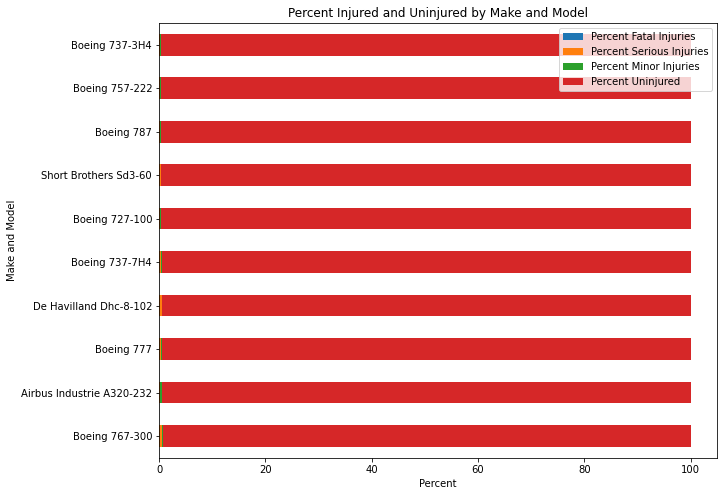

In [31]:
accidents_subset_plot = accidents_subset[-10:].drop(['Total.Number.Passengers', 'Number.Accidents'], axis=1)
accidents_subset_plot.rename(columns={'Percent.Fatal.Injuries': 'Percent Fatal Injuries', 
                                      'Percent.Serious.Injuries': 'Percent Serious Injuries',
                                     'Percent.Minor.Injuries': 'Percent Minor Injuries',
                                     'Percent.Uninjured': 'Percent Uninjured'}, inplace=True)
accidents_subset_plot.set_index('Make and Model', inplace=True)
accidents_subset_plot.plot.barh(stacked=True, figsize=(10,8))
plt.title('Percent Injured and Uninjured by Make and Model')
plt.xlabel('Percent')
plt.ylabel('Make and Model');

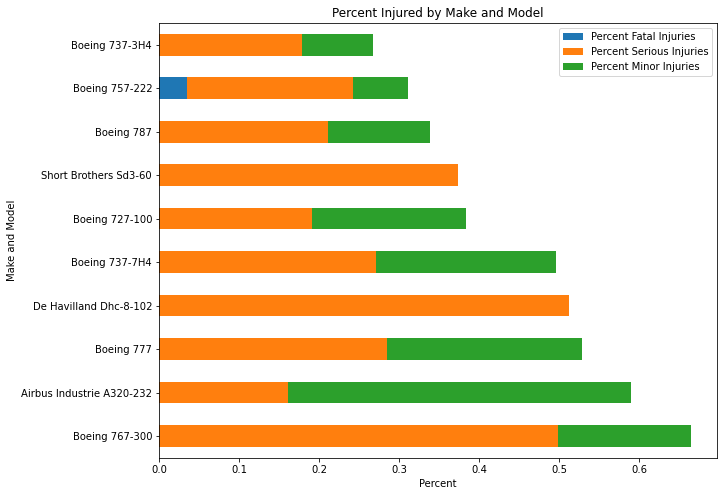

In [32]:
accidents_subset_plot = accidents_subset[-10:].drop(['Total.Number.Passengers', 'Number.Accidents',
                                                    'Percent.Uninjured'], axis=1)
accidents_subset_plot.rename(columns={'Percent.Fatal.Injuries': 'Percent Fatal Injuries', 
                                      'Percent.Serious.Injuries': 'Percent Serious Injuries',
                                     'Percent.Minor.Injuries': 'Percent Minor Injuries',
                                     'Percent.Uninjured': 'Percent Uninjured'}, inplace=True)
accidents_subset_plot.set_index('Make and Model', inplace=True)
accidents_subset_plot.plot.barh(stacked=True, figsize=(10,8))
plt.title("Percent Injured by Make and Model")
plt.ylabel("Make and Model")
plt.xlabel("Percent");

As illustrated in the bar chart above, the 10 airplanes with the highest percent of passengers uninjured have nearly a 100% uninjury rate: in fact, all have over 99.3% of passengers uninjured. The top airplane is the **Boeing 737-3H4**, with 99.73% of passengers uninjured. The **Boeing 757-222** is the only airplane in this subset that has a fatality (only one).

# Comparing Injury Percentages by Weather

In [33]:
df['Weather.Condition'].value_counts()

VMC        73310
IMC         5838
UNKNOWN     2873
UNK          981
Name: Weather.Condition, dtype: int64

Here, I am assuming that "UNK" is an abbreviation for unknown, so I will adjust the cells containing the "UNK" abbreviation.

In [34]:
df.loc[df['Weather.Condition'] == 'UNK', 'Weather.Condition'] = 'UNKNOWN'

In [35]:
#created a dataframe including the injury categories by weather condition
injuries_by_weather = df.groupby('Weather.Condition')['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                                                     'Total.Minor.Injuries', 'Total.Uninjured', 
                                                      'Total.Number.Passengers'].sum().reset_index()
injuries_by_weather

<ipython-input-35-209987083229>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  injuries_by_weather = df.groupby('Weather.Condition')['Total.Fatal.Injuries', 'Total.Serious.Injuries',


,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Number.Passengers
0,IMC,11588.0,2120.0,2700.0,39627.0,56035.0
1,UNKNOWN,12051.0,1630.0,1587.0,98188.0,113456.0
2,VMC,24495.0,16122.0,21834.0,298851.0,361302.0


In [36]:
#found the percent for each injured/uninjured category
injuries_by_weather['Percent.Fatal.Injuries'] = ((injuries_by_weather['Total.Fatal.Injuries'] / 
                                                    injuries_by_weather['Total.Number.Passengers'])*100)
injuries_by_weather['Percent.Serious.Injuries'] = ((injuries_by_weather['Total.Serious.Injuries'] / 
                                                    injuries_by_weather['Total.Number.Passengers'])*100)
injuries_by_weather['Percent.Minor.Injuries'] = ((injuries_by_weather['Total.Minor.Injuries'] / 
                                                      injuries_by_weather['Total.Number.Passengers'])*100)
injuries_by_weather['Percent.Uninjured'] = ((injuries_by_weather['Total.Uninjured'] / 
                                                 injuries_by_weather['Total.Number.Passengers'])*100)

#dropped the totals per category since percentages provide a clearer comparison
injuries_by_weather.drop(['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
                        'Total.Uninjured'], axis=1, inplace=True)
injuries_by_weather

,Weather.Condition,Total.Number.Passengers,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
0,IMC,56035.0,20.679932,3.783350,4.818417,70.718301
1,UNKNOWN,113456.0,10.621739,1.436680,1.398780,86.542801
2,VMC,361302.0,6.779647,4.462195,6.043144,82.715014


In [37]:
#dropped 'UNKNOWN' weather condition, since this will not aid in analysis
injuries_by_weather.drop(1, inplace=True)

In [38]:
injuries_by_weather

,Weather.Condition,Total.Number.Passengers,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
0,IMC,56035.0,20.679932,3.783350,4.818417,70.718301
2,VMC,361302.0,6.779647,4.462195,6.043144,82.715014


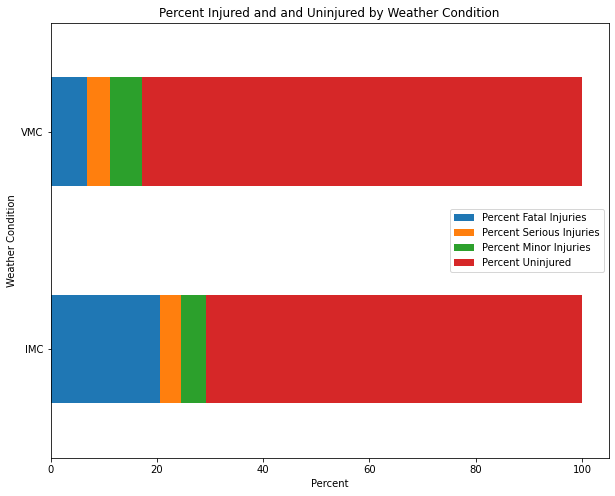

In [39]:
weather_plot = injuries_by_weather.drop(['Total.Number.Passengers'], axis=1)
weather_plot.rename(columns={'Percent.Fatal.Injuries': 'Percent Fatal Injuries', 
                                      'Percent.Serious.Injuries': 'Percent Serious Injuries',
                                     'Percent.Minor.Injuries': 'Percent Minor Injuries',
                                     'Percent.Uninjured': 'Percent Uninjured'}, inplace=True)
weather_plot.set_index('Weather.Condition', inplace=True)
weather_plot.plot.barh(stacked=True, figsize=(10,8))
plt.title("Percent Injured and and Uninjured by Weather Condition")
plt.ylabel("Weather Condition")
plt.xlabel("Percent");

# Comparing Injury Percentages by Phase of Flight

In [40]:
df.loc[df['Broad.phase.of.flight'] == 'OTHER', 'Broad.phase.of.flight'] = 'UNKNOWN'

In [41]:
#created a dataframe including the injury categories by phase of flight
phase = df.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                                                     'Total.Minor.Injuries', 'Total.Uninjured', 
                                                      'Total.Number.Passengers'].sum().reset_index()
phase

<ipython-input-41-4a10daf20337>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  phase = df.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries', 'Total.Serious.Injuries',


,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Number.Passengers
0,APPROACH,3825.0,1889.0,2480.0,21422.0,29616.0
1,CLIMB,1760.0,592.0,956.0,19484.0,22792.0
2,CRUISE,6100.0,2147.0,4483.0,45553.0,58283.0
3,DESCENT,909.0,464.0,984.0,18919.0,21276.0
4,GO-AROUND,587.0,387.0,622.0,2041.0,3637.0
5,LANDING,511.0,1181.0,3151.0,48151.0,52994.0
6,MANEUVERING,5241.0,1853.0,1893.0,5193.0,14180.0
7,STANDING,158.0,237.0,386.0,18556.0,19337.0
8,TAKEOFF,4291.0,3115.0,4913.0,44915.0,57234.0
9,TAXI,102.0,110.0,499.0,38249.0,38960.0


In [42]:
#found the percent for each injured/uninjured category
phase['Percent.Fatal.Injuries'] = ((phase['Total.Fatal.Injuries'] / 
                                    phase['Total.Number.Passengers'])*100)
phase['Percent.Serious.Injuries'] = ((phase['Total.Serious.Injuries'] / 
                                    phase['Total.Number.Passengers'])*100)
phase['Percent.Minor.Injuries'] = ((phase['Total.Minor.Injuries'] / 
                                    phase['Total.Number.Passengers'])*100)
phase['Percent.Uninjured'] = ((phase['Total.Uninjured'] / 
                                phase['Total.Number.Passengers'])*100)

#dropped the totals per category since percentages provide a clearer comparison
phase.drop(['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
                        'Total.Uninjured', 'Total.Number.Passengers'], axis=1, inplace=True)
phase.set_index('Broad.phase.of.flight', inplace=True)
phase

,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
Broad.phase.of.flight,,,,
APPROACH,12.915316,6.378309,8.373852,72.332523
CLIMB,7.722008,2.597403,4.194454,85.486135
CRUISE,10.466174,3.683750,7.691780,78.158297
DESCENT,4.272420,2.180861,4.624929,88.921790
GO-AROUND,16.139676,10.640638,17.102007,56.117679
LANDING,0.964260,2.228554,5.945956,90.861230
MANEUVERING,36.960508,13.067701,13.349788,36.622003
STANDING,0.817086,1.225630,1.996173,95.961111
TAKEOFF,7.497292,5.442569,8.584058,78.476081


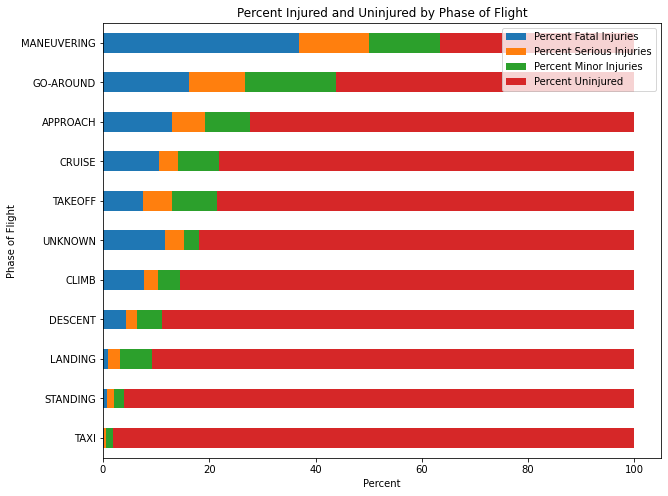

In [43]:
phase.rename(columns={'Percent.Fatal.Injuries': 'Percent Fatal Injuries', 
                                      'Percent.Serious.Injuries': 'Percent Serious Injuries',
                                     'Percent.Minor.Injuries': 'Percent Minor Injuries',
                                     'Percent.Uninjured': 'Percent Uninjured'}, inplace=True)
phase.sort_values('Percent Uninjured', ascending=False, inplace=True)
phase.plot.barh(stacked=True, figsize=(10,8))
plt.title("Percent Injured and Uninjured by Phase of Flight")
plt.ylabel("Phase of Flight")
plt.xlabel("Percent");

# Comparing Injury Percentages by Amateur Built

In [44]:
#created a dataframe including the injury categories by amateur built or not
amateur_built = df.groupby('Amateur.Built')['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                                                     'Total.Minor.Injuries', 'Total.Uninjured', 
                                                      'Total.Number.Passengers'].sum().reset_index()
amateur_built

<ipython-input-44-dbf5f8a5d38a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  amateur_built = df.groupby('Amateur.Built')['Total.Fatal.Injuries', 'Total.Serious.Injuries',


,Amateur.Built,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Number.Passengers
0,NO,44660.0,17984.0,23787.0,428935.0,515366.0
1,UNKNOWN,422.0,57.0,8.0,1161.0,1648.0
2,YES,3052.0,1831.0,2326.0,6570.0,13779.0


In [45]:
#found the percent for each injured/uninjured category
amateur_built['Percent.Fatal.Injuries'] = ((amateur_built['Total.Fatal.Injuries'] / 
                                            amateur_built['Total.Number.Passengers'])*100)
amateur_built['Percent.Serious.Injuries'] = ((amateur_built['Total.Serious.Injuries'] / 
                                              amateur_built['Total.Number.Passengers'])*100)
amateur_built['Percent.Minor.Injuries'] = ((amateur_built['Total.Minor.Injuries'] / 
                                            amateur_built['Total.Number.Passengers'])*100)
amateur_built['Percent.Uninjured'] = ((amateur_built['Total.Uninjured'] / 
                                       amateur_built['Total.Number.Passengers'])*100)

#dropped the totals per category since percentages provide a clearer comparison
amateur_built.drop(['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
                        'Total.Uninjured'], axis=1, inplace=True)

amateur_built

,Amateur.Built,Total.Number.Passengers,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
0,NO,515366.0,8.665686,3.489559,4.615555,83.229200
1,UNKNOWN,1648.0,25.606796,3.458738,0.485437,70.449029
2,YES,13779.0,22.149648,13.288337,16.880761,47.681254


In [46]:
amateur_built.set_index('Amateur.Built', inplace=True)
amateur_built.drop('UNKNOWN', inplace=True)
amateur_built_plot = amateur_built.drop(['Total.Number.Passengers'], axis=1)

In [47]:
amateur_built_plot.rename(columns={'Percent.Fatal.Injuries': 'Percent Fatal Injuries', 
                                      'Percent.Serious.Injuries': 'Percent Serious Injuries',
                                     'Percent.Minor.Injuries': 'Percent Minor Injuries',
                                     'Percent.Uninjured': 'Percent Uninjured'}, inplace=True)

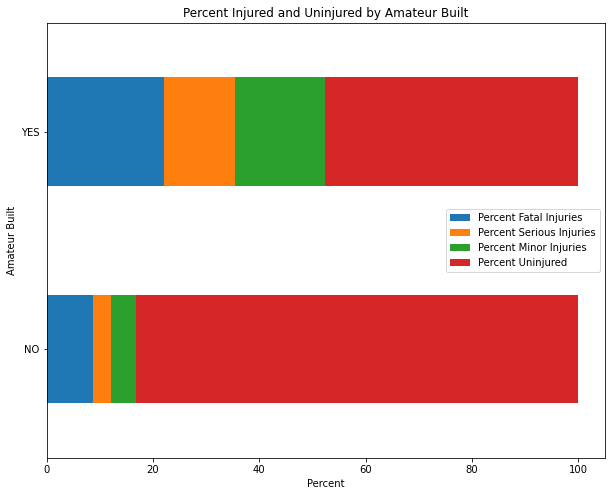

In [48]:
amateur_built_plot.plot.barh(stacked=True, figsize=(10,8))
plt.title("Percent Injured and Uninjured by Amateur Built")
plt.ylabel("Amateur Built")
plt.xlabel("Percent");